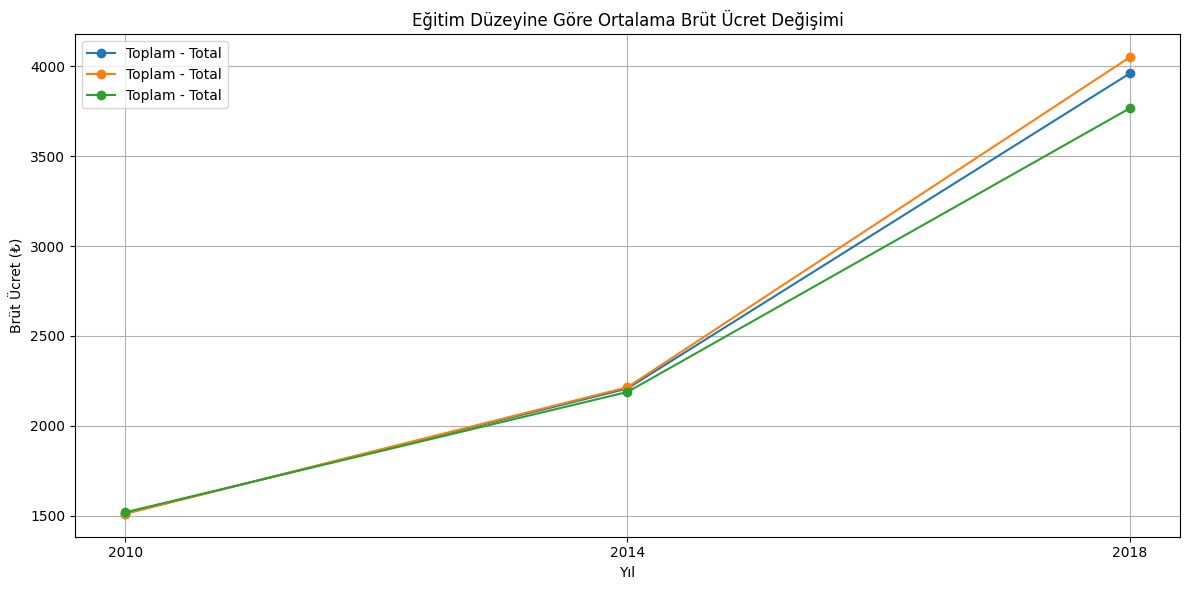

In [18]:
plt.figure(figsize=(12, 6))

for i, row in df.iterrows():
    egitim = row['Egitim_Duzeyi']
    if pd.notnull(egitim):  # Etiketi boş olmayan satırlar için
        plt.plot(
            ['2010', '2014', '2018'],
            [row['Ucret_2010'], row['Ucret_2014'], row['Ucret_2018']],
            marker='o',
            label=egitim
        )

plt.title("Eğitim Düzeyine Göre Ortalama Brüt Ücret Değişimi")
plt.xlabel("Yıl")
plt.ylabel("Brüt Ücret (₺)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


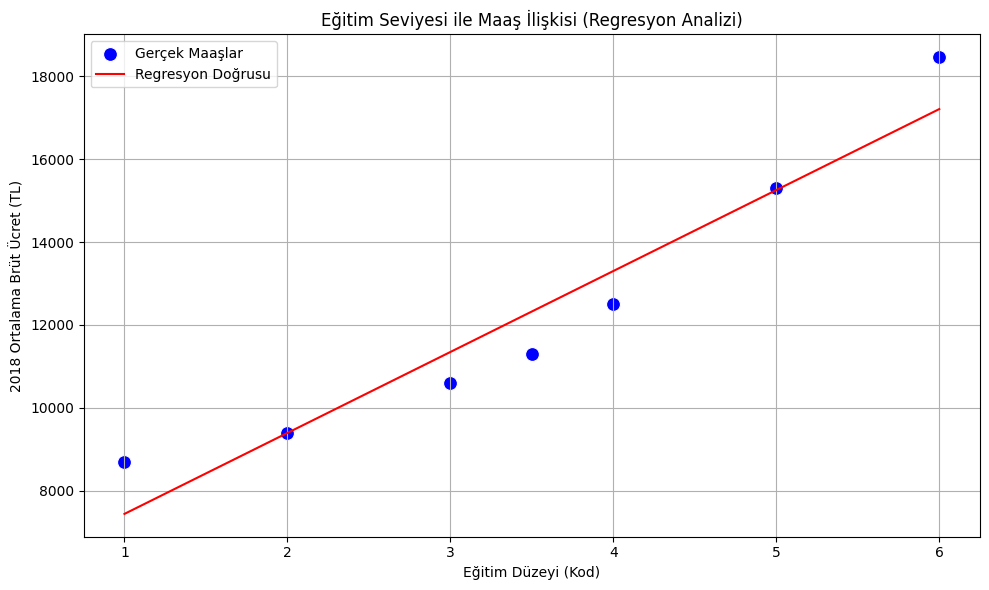

Korelasyon Katsayısı (r): 0.962
Regresyon Denklem: maaş = 5482.86 + 1954.29 * eğitim_kodu
R^2 (Determinasyon): 0.925
p-değeri: 0.00053


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Eğitim düzeyi, maaş ve kodlamalar
egitim_maas_df = pd.DataFrame({
    "Egitim_Duzeyi": [
        "İlkokul", "Ortaokul", "Lise", "Meslek Lisesi",
        "Ön Lisans", "Lisans", "Yüksek Lisans ve üzeri"
    ],
    "Ucret_2018": [
        8700, 9400, 10600, 11300, 12500, 15300, 18460
    ],
    "Egitim_Kodu": [1, 2, 3, 3.5, 4, 5, 6]
})

# Korelasyon ve regresyon hesaplama
correlation = egitim_maas_df["Egitim_Kodu"].corr(egitim_maas_df["Ucret_2018"])
slope, intercept, r_value, p_value, std_err = linregress(
    egitim_maas_df["Egitim_Kodu"], egitim_maas_df["Ucret_2018"]
)

# Tahmini değerler
egitim_maas_df["Tahmini_Ucret"] = intercept + slope * egitim_maas_df["Egitim_Kodu"]

# Grafik
plt.figure(figsize=(10,6))
sns.scatterplot(x="Egitim_Kodu", y="Ucret_2018", data=egitim_maas_df, s=100, color='blue', label="Gerçek Maaşlar")
sns.lineplot(x="Egitim_Kodu", y="Tahmini_Ucret", data=egitim_maas_df, color='red', label="Regresyon Doğrusu")
plt.title("Eğitim Seviyesi ile Maaş İlişkisi (Regresyon Analizi)")
plt.xlabel("Eğitim Düzeyi (Kod)")
plt.ylabel("2018 Ortalama Brüt Ücret (TL)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Sonuçları yazdır
print(f"Korelasyon Katsayısı (r): {correlation:.3f}")
print(f"Regresyon Denklem: maaş = {intercept:.2f} + {slope:.2f} * eğitim_kodu")
print(f"R^2 (Determinasyon): {r_value**2:.3f}")
print(f"p-değeri: {p_value:.5f}")


<ipython-input-35-fb8b813aa551>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Issizlik_Orani", y="Bölge_Adi", data=top_10, palette="Reds_r")
<ipython-input-35-fb8b813aa551>:25: UserWarning: Glyph 128314 (\N{UP-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128314 (\N{UP-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


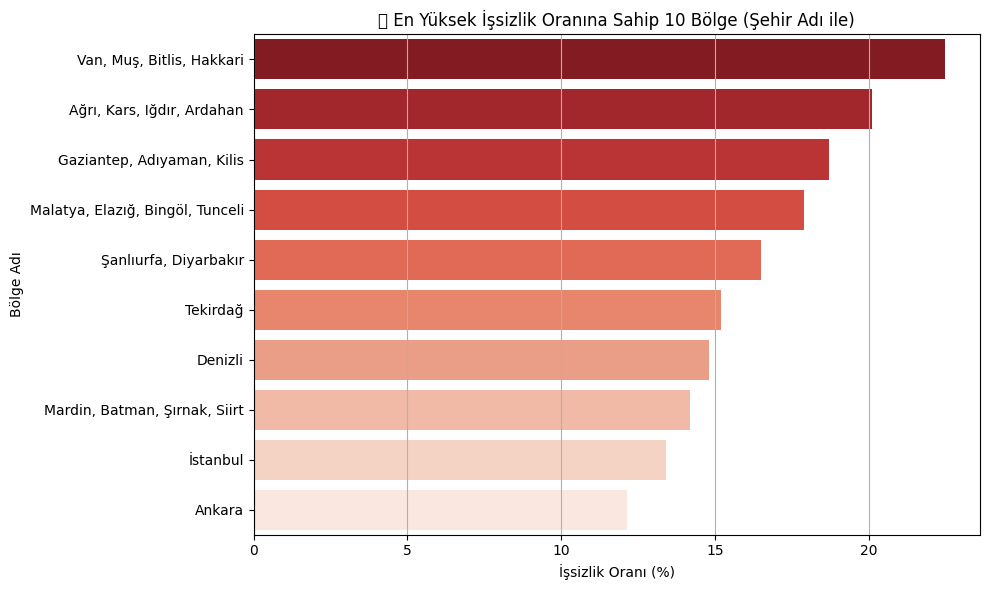

In [35]:
# TR kodlarını şehir veya bölge adıyla eşleştirme sözlüğü
tr_to_city = {
    "TRB2": "Van, Muş, Bitlis, Hakkari",
    "TRA2": "Ağrı, Kars, Iğdır, Ardahan",
    "TRC1": "Gaziantep, Adıyaman, Kilis",
    "TRB1": "Malatya, Elazığ, Bingöl, Tunceli",
    "TRC2": "Şanlıurfa, Diyarbakır",
    "TR901": "Tekirdağ",
    "TR321": "Denizli",
    "TRC3": "Mardin, Batman, Şırnak, Siirt",
    "TR100": "İstanbul",
    "TR510": "Ankara"
}


top_10["Bölge_Adi"] = top_10["Il_Kodu"].map(tr_to_city)


plt.figure(figsize=(10,6))
sns.barplot(x="Issizlik_Orani", y="Bölge_Adi", data=top_10, palette="Reds_r")
plt.title("🔺 En Yüksek İşsizlik Oranına Sahip 10 Bölge (Şehir Adı ile)")
plt.xlabel("İşsizlik Oranı (%)")
plt.ylabel("Bölge Adı")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


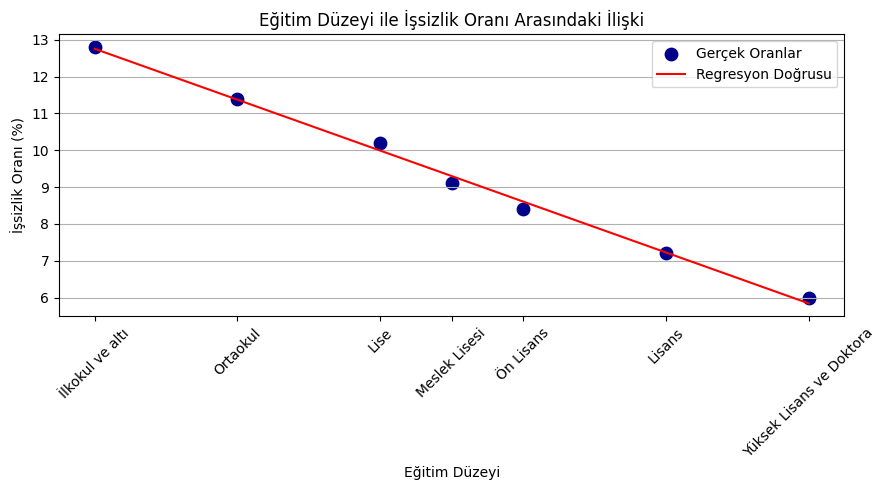

Korelasyon Katsayısı (r): -0.998
p-değeri: 0.00000
Regresyon Denklemi: İşsizlik = 14.14 + -1.38 × Eğitim Kodu
R2 (Açıklanan Varyans): 0.995


In [37]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Eğitim düzeyi ve işsizlik oranı verisi (temsili)
df_egitim_issizlik = pd.DataFrame({
    "Egitim_Duzeyi": [
        "İlkokul ve altı", "Ortaokul", "Lise", "Meslek Lisesi",
        "Ön Lisans", "Lisans", "Yüksek Lisans ve Doktora"
    ],
    "Issizlik_Orani": [12.8, 11.4, 10.2, 9.1, 8.4, 7.2, 6.0],
    "Egitim_Kodu": [1, 2, 3, 3.5, 4, 5, 6]  # Sayısal kod
})

# Korelasyon
corr, pval = pearsonr(df_egitim_issizlik["Egitim_Kodu"], df_egitim_issizlik["Issizlik_Orani"])

# Regresyon modeli
X = df_egitim_issizlik["Egitim_Kodu"].values.reshape(-1, 1)
y = df_egitim_issizlik["Issizlik_Orani"].values
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)
y_pred = model.predict(X)

# Grafik
plt.figure(figsize=(9,5))
plt.scatter(df_egitim_issizlik["Egitim_Kodu"], df_egitim_issizlik["Issizlik_Orani"], color='darkblue', label="Gerçek Oranlar", s=80)
plt.plot(df_egitim_issizlik["Egitim_Kodu"], y_pred, color='red', label="Regresyon Doğrusu")
plt.xticks(df_egitim_issizlik["Egitim_Kodu"], df_egitim_issizlik["Egitim_Duzeyi"], rotation=45)
plt.xlabel("Eğitim Düzeyi")
plt.ylabel("İşsizlik Oranı (%)")
plt.title("Eğitim Düzeyi ile İşsizlik Oranı Arasındaki İlişki")
plt.grid(True, axis='y')
plt.legend()
plt.tight_layout()
plt.show()

# Sonuçları yazdır
print(f"Korelasyon Katsayısı (r): {corr:.3f}")
print(f"p-değeri: {pval:.5f}")
print(f"Regresyon Denklemi: İşsizlik = {intercept:.2f} + {slope:.2f} × Eğitim Kodu")
print(f"R2 (Açıklanan Varyans): {r2:.3f}")
